# Load libraries and datasets

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('portfolio_metrics_shuffle.csv')
df3 = pd.read_csv('portfolio_metrics_cbpb.csv')

* Shuffled dataframe

In [27]:
df

,ST,CB,PB,GO,CA,Methodology,Rebal.,Cost,Volatility,Return_1M,Return_3M,Return_6M,Return_9M,Return_12M
0,20,15,15,35,15,DCA,YES,153,5.394548,1.61,-3.41,5.11,4.58,4.49
1,30,0,5,5,60,DCA,NO,83,6.210681,0.21,-5.20,1.29,1.87,4.07
2,15,30,20,20,15,DCA,YES,141,5.355219,1.44,-2.82,4.19,2.91,2.75
3,15,15,55,10,5,DCA,YES,200,5.320018,1.91,-2.07,2.44,1.13,0.94
4,15,0,50,30,5,DCA,YES,211,5.341424,2.25,-1.77,3.65,3.11,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,25,50,5,0,1-OFF,NO,196,1.671645,1.71,-2.05,3.42,2.62,3.31
96,45,10,35,10,0,1-OFF,YES,206,3.645725,1.25,-7.44,1.35,2.53,6.01
97,35,15,30,15,5,1-OFF,YES,186,3.303359,1.40,-5.46,2.98,4.08,6.78
98,15,10,5,35,35,1-OFF,NO,114,3.612575,1.50,-1.86,5.66,8.09,9.54


* Client's dataframe

In [28]:
df3

,ST,CB,PB,GO,CA,Methodology,Rebal.,Cost,Volatility,Return_1M,Return_3M,Return_6M,Return_9M,Return_12M
0,0,85,5,0,0,1-OFF,NO,81,2.112330,1.19,-0.14,7.65,4.59,3.71
1,0,85,5,0,0,1-OFF,YES,81,34.999898,-8.92,-27.20,-42.79,-59.48,-70.71
2,0,85,5,0,0,DCA,NO,81,6.177924,1.19,-1.82,5.63,1.68,0.50
3,0,85,5,0,0,DCA,YES,81,4.200776,-9.00,-20.31,-26.45,-38.16,-46.12
4,0,80,10,0,0,1-OFF,NO,89,1.995818,1.28,0.09,7.43,4.44,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,10,80,0,0,DCA,YES,211,4.141738,-7.75,-17.95,-29.43,-39.36,-47.34
64,0,5,85,0,0,1-OFF,NO,219,1.537069,2.55,3.61,4.22,2.18,0.43
65,0,5,85,0,0,1-OFF,YES,219,36.476947,-7.70,-24.47,-44.61,-60.41,-71.63
66,0,5,85,0,0,DCA,NO,219,6.158272,2.55,1.26,0.58,-0.91,-2.35


# Exercise 1: Evolution of the return

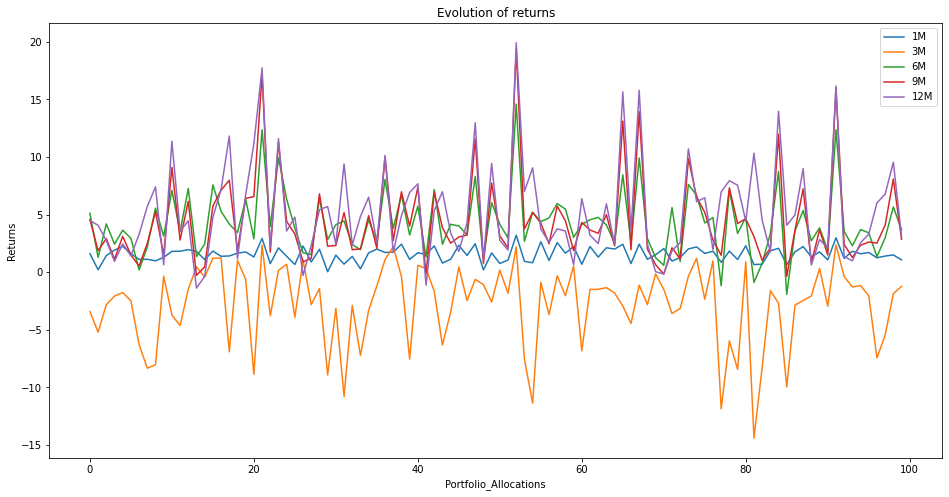

In [29]:
firstm = df.Return_1M

thirdm = df.Return_3M

sixthm = df.Return_6M

ninethm = df.Return_9M

twelfth = df.Return_12M

plt.figure(figsize=(16,8))
plt.plot(df.index, firstm, label = "1M")
plt.plot(df.index, thirdm, label = "3M")
plt.plot(df.index, sixthm, label = "6M")
plt.plot(df.index, ninethm, label = "9M")
plt.plot(df.index, twelfth, label = "12M")

plt.ylabel("Returns")
plt.xlabel("Portfolio_Allocations")
plt.title("Evolution of returns")
plt.legend()
plt.show()

# Exercise 2: Return vs Risk

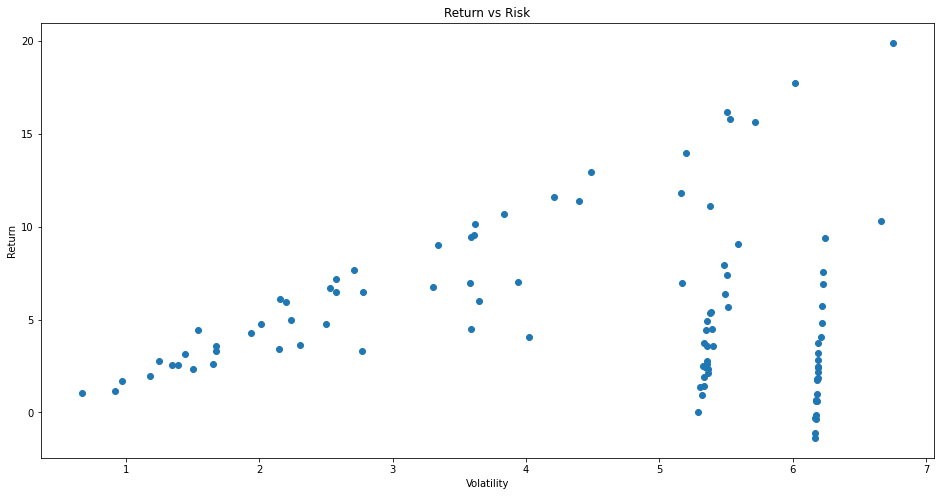

In [30]:
plt.figure(figsize=(16,8))

plt.ylabel("Return")
plt.xlabel("Volatility")
plt.title("Return vs Risk")
plt.scatter(df.Volatility, df.Return_12M)
plt.show()

# Exercise 3: Financial advisoring

* Evolution of the proposed distribution

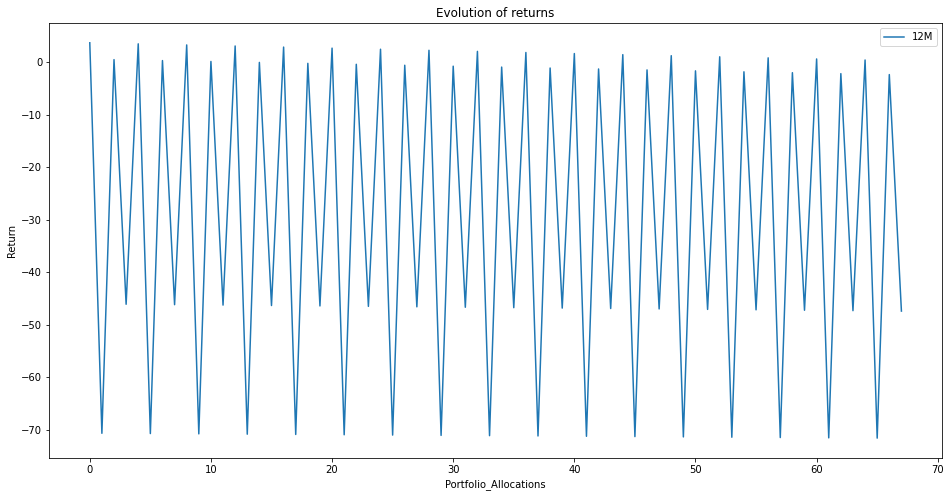

In [31]:
twelfth = df3.Return_12M

plt.figure(figsize=(16,8))
plt.plot(df3.index, twelfth, label = "12M")

plt.ylabel("Return")
plt.xlabel("Portfolio_Allocations")
plt.title("Evolution of returns")
plt.legend()
plt.show()

* Analysis of recommendation

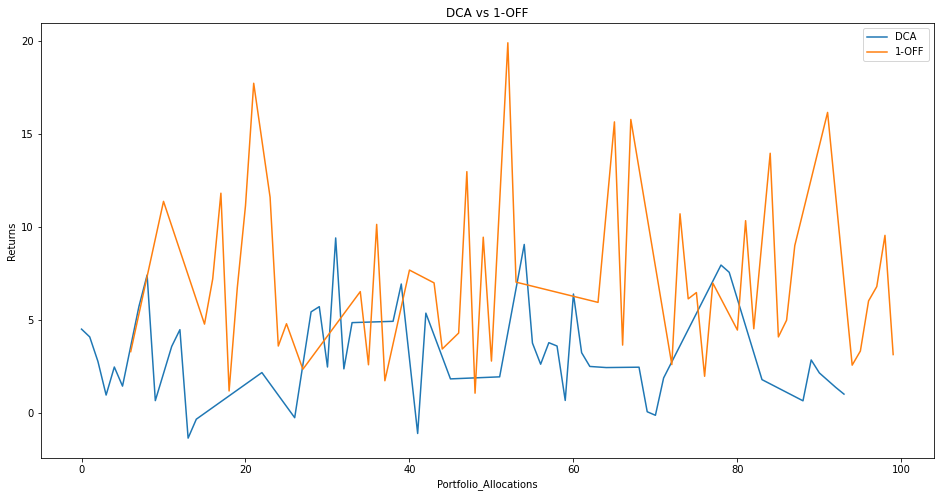

In [32]:
maskDCA = df['Methodology'] == 'DCA'
dfDCA = df[maskDCA]
mask1OFF = df['Methodology'] == '1-OFF'
df1OFF = df[mask1OFF]

dca_return = dfDCA.Return_12M
oneoff_return = df1OFF.Return_12M

plt.figure(figsize=(16,8))
plt.plot(dfDCA.index, dca_return, label = "DCA")
plt.plot(df1OFF.index, oneoff_return, label = "1-OFF")

plt.ylabel("Returns")
plt.xlabel("Portfolio_Allocations")
plt.title("DCA vs 1-OFF")
plt.legend()
plt.show()

In [33]:
maskRebalYes = df1OFF['Rebal.'] == 'YES'
maskRebalNO = df1OFF['Rebal.'] == 'NO'
dfRebalYES = df1OFF[maskRebalYes]
dfRebalNO = df1OFF[maskRebalNO]

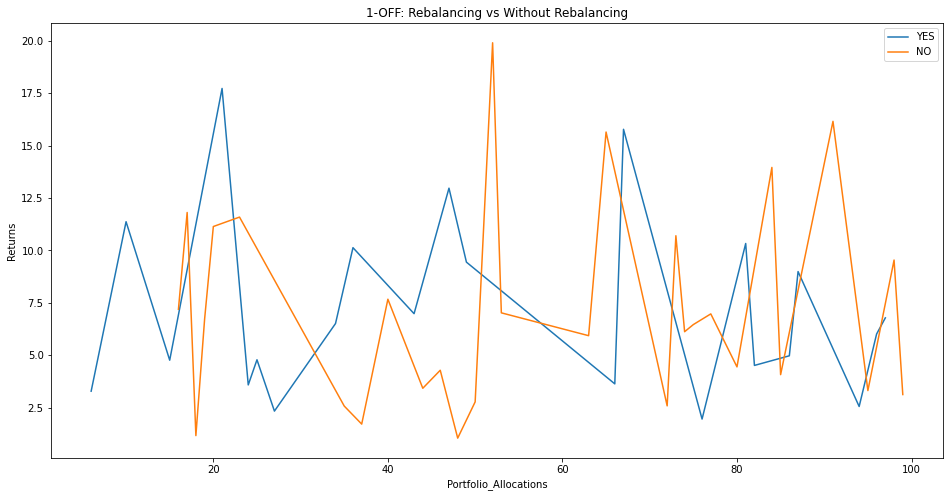

In [34]:
yes_return = dfRebalYES.Return_12M
no_return = dfRebalNO.Return_12M

plt.figure(figsize=(16,8))
plt.plot(dfRebalYES.index, yes_return, label = "YES")
plt.plot(dfRebalNO.index, no_return, label = "NO")

plt.ylabel("Returns")
plt.xlabel("Portfolio_Allocations")
plt.title("1-OFF: Rebalancing vs Without Rebalancing")
plt.legend()
plt.show()